<a href="https://www.kaggle.com/code/syedasimalishah/eda-q1-q30?scriptVersionId=108306315" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', 225)
sns.set(font_scale=1.5)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_methodology.pdf
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_answer_choices.pdf


In [117]:
df = pd.read_csv("/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [118]:
df.head(3)

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,...,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udemy,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - LinkedIn Learning,"On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - University Courses (resulting in a university degree),On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - None,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other,What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - University courses,"What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - Online courses (Coursera, EdX, etc)","What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - Social media platforms (Reddit, Twitter, etc)","What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - Video platforms (YouTube, Twitch, etc)","What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - Kaggle (notebooks, competitions, etc)",What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - None / I do not study data science,What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - Other,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,"Have you ever published any academic research (papers, preprints, conference proceedings, etc)?","Did your research make use of machine learning? - Yes, the research made advances related to some novel machine learning method (theoretic

In [119]:
df.shape

(23998, 296)

In [120]:
df.dtypes

Duration (in seconds)    object
Q2                       object
Q3                       object
Q4                       object
Q5                       object
                          ...  
Q44_8                    object
Q44_9                    object
Q44_10                   object
Q44_11                   object
Q44_12                   object
Length: 296, dtype: object

In [121]:
df = df.iloc[1:]
#df["Duration (in seconds)"].astype("int32")
#plt.figure(figsize=(26,6))
#ax = sns.histplot(df1,x = "Duration (in seconds)",bins=5)
#ax.tick_params(axis='x', rotation=88)

# What is your age (years)?

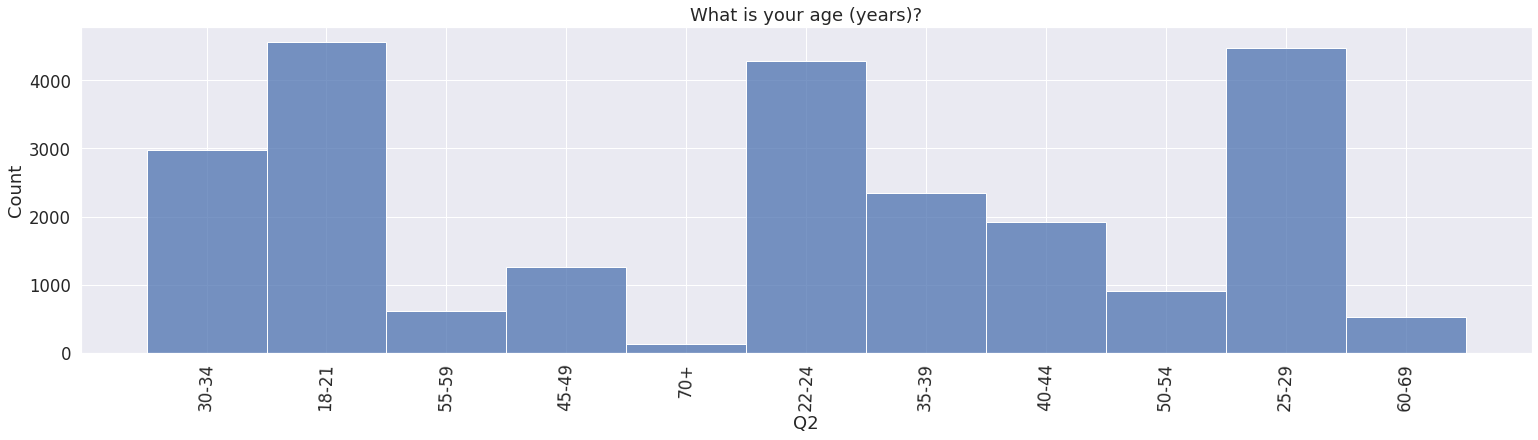

In [122]:
plt.figure(figsize=(26,6))
ax = sns.histplot(df,x = "Q2")
ax.tick_params(axis='x', rotation=88)
plt.title('What is your age (years)?')
plt.show()

# What is your gender?

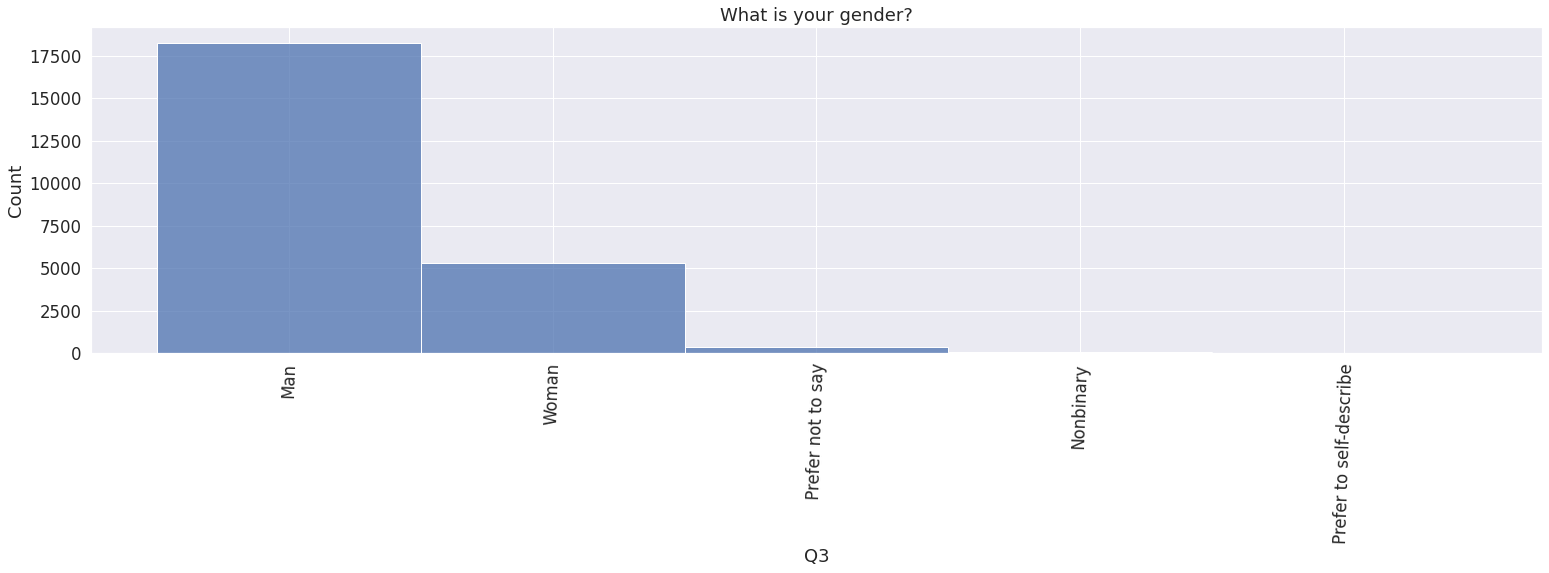

In [123]:
plt.figure(figsize=(26,6))
ax = sns.histplot(df,x = "Q3")
ax.tick_params(axis='x', rotation=88)
plt.title('What is your gender?')
plt.show()

# In which country do you currently reside?

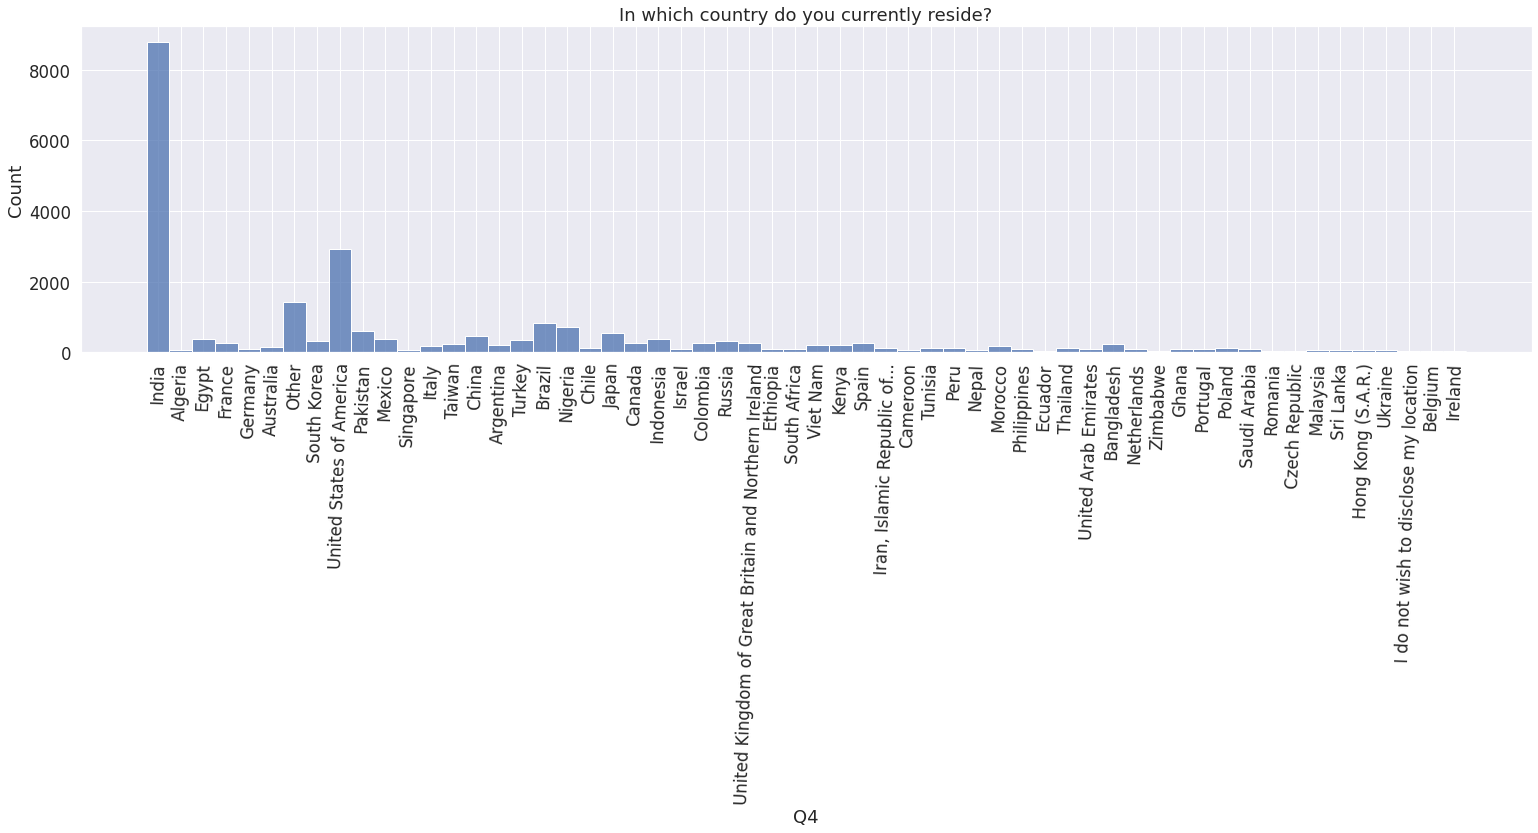

In [124]:
plt.figure(figsize=(26,6))
ax = sns.histplot(df,x = "Q4")
ax.tick_params(axis='x', rotation=88)
plt.title('In which country do you currently reside?')
plt.show()

# Are you currently a student? (high school, university, or graduate)

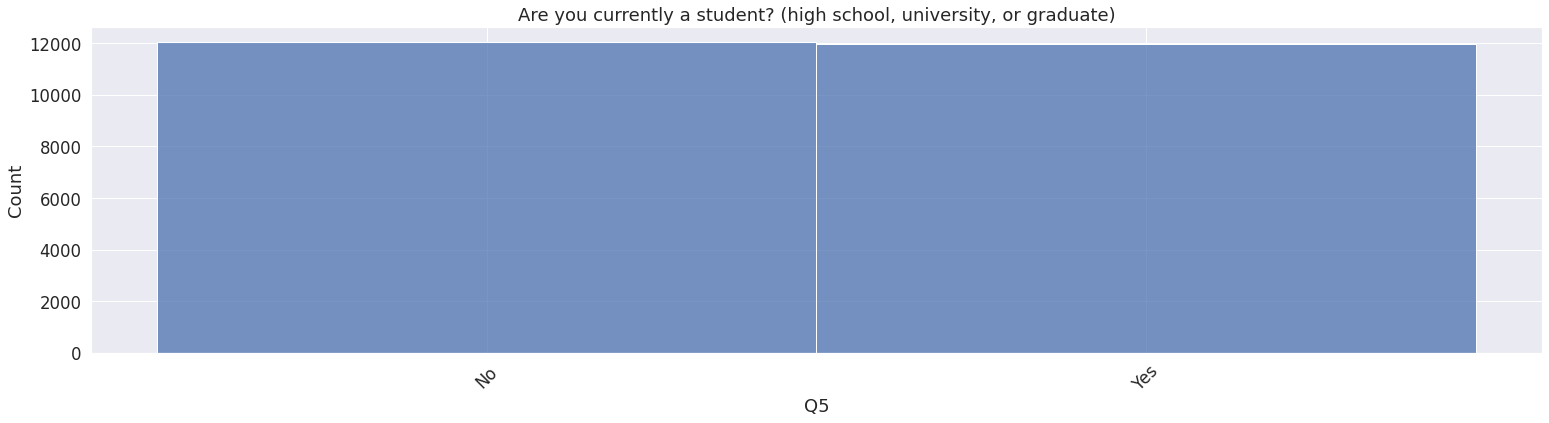

In [125]:
plt.figure(figsize=(26,6))
ax = sns.histplot(df,x = "Q5")
ax.tick_params(axis='x', rotation=45)
plt.title('Are you currently a student? (high school, university, or graduate)')
plt.show()

# On which platforms have you begun or completed data science courses?

In [126]:
q6 = df.iloc[:,5:17]
q6 = q6.iloc[1:]
q6.columns=["Coursera","edX","Kaggle Learn Courses","DataCamp","Fast.ai","Udacity","Udemy","LinkedIn Learning","Certification program","University Courses","None","Other"]

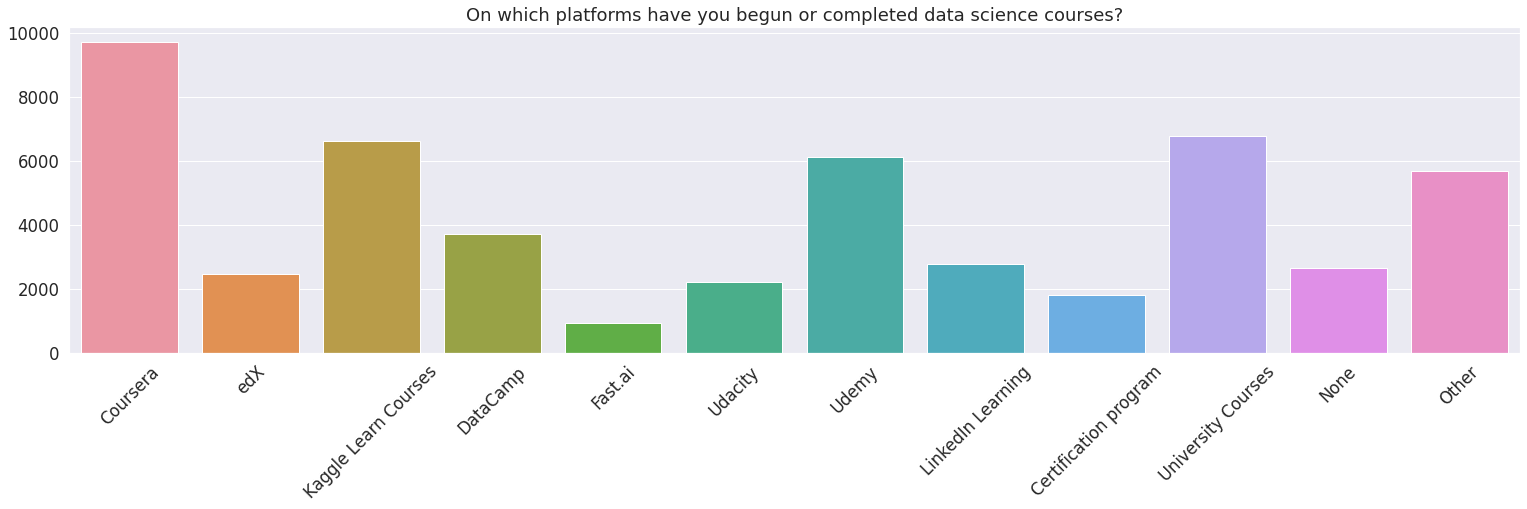

In [127]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q6.notna().sum()).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=45)
plt.title('On which platforms have you begun or completed data science courses?')
plt.show()

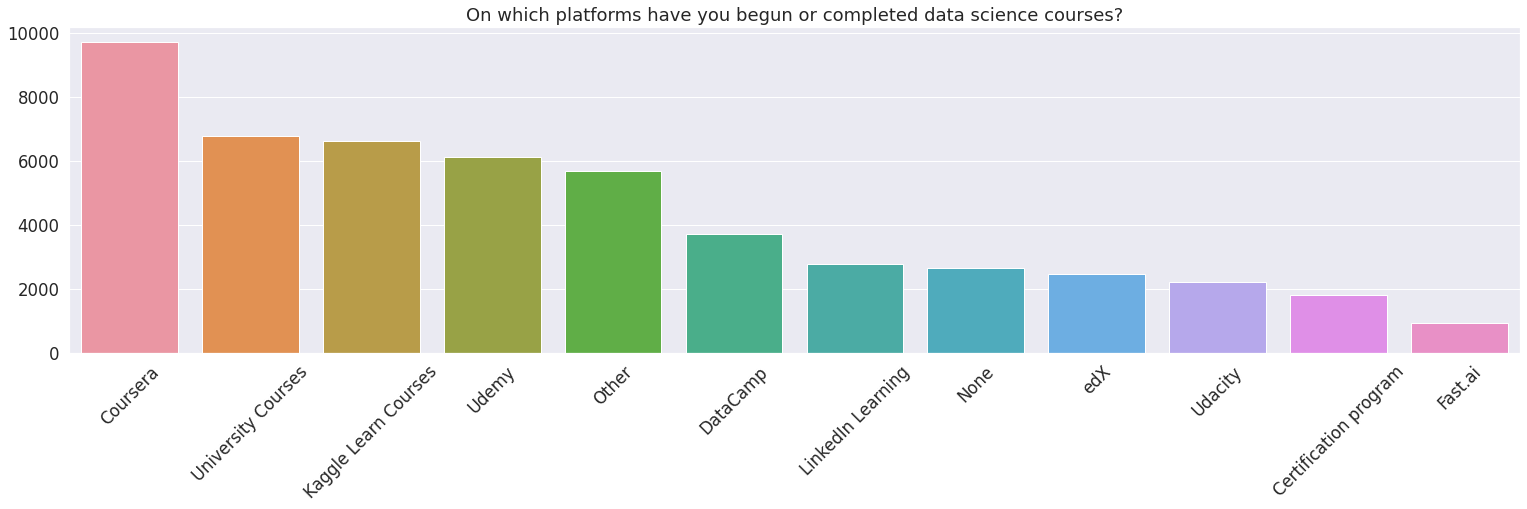

In [128]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q6.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=45)
plt.title('On which platforms have you begun or completed data science courses?')
plt.show()

# What products or platforms did you find to be most helpful when you first started studying data science?

In [129]:
df = pd.read_csv("/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [130]:
q7 = df.iloc[:,17:24]
cc = q7.iloc[0,:]
cc = [a.split("-")[-1] for a in cc]
q7 = q7.iloc[1:]
q7.columns=cc
q7

,University courses,"Online courses (Coursera, EdX, etc)","Social media platforms (Reddit, Twitter, etc)","Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",None / I do not study data science,Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,University courses,NaN,NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN
3,NaN,"Online courses (Coursera, EdX, etc)",NaN,"Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,NaN
4,NaN,"Online courses (Coursera, EdX, etc)",NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN
5,University courses,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
23993,University courses,NaN,NaN,"Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,Other
23994,University courses,NaN,NaN,"Video platforms (YouTube, Twitch, etc)",NaN,NaN,NaN
23995,NaN,"Online courses (Coursera, EdX, etc)","Social media platforms (Reddit, Twitter, etc)","Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,NaN
23996,NaN,NaN,NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN


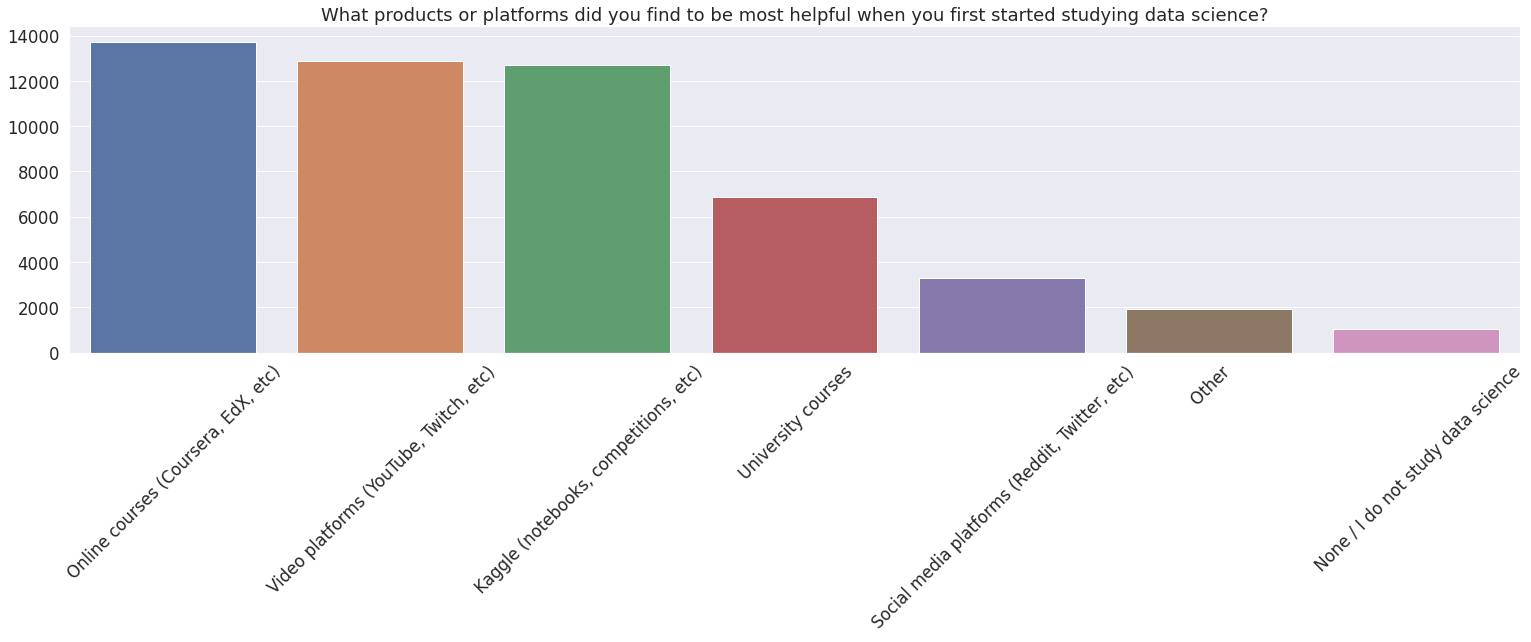

In [131]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q7.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=45)
plt.title('What products or platforms did you find to be most helpful when you first started studying data science?')
plt.show()

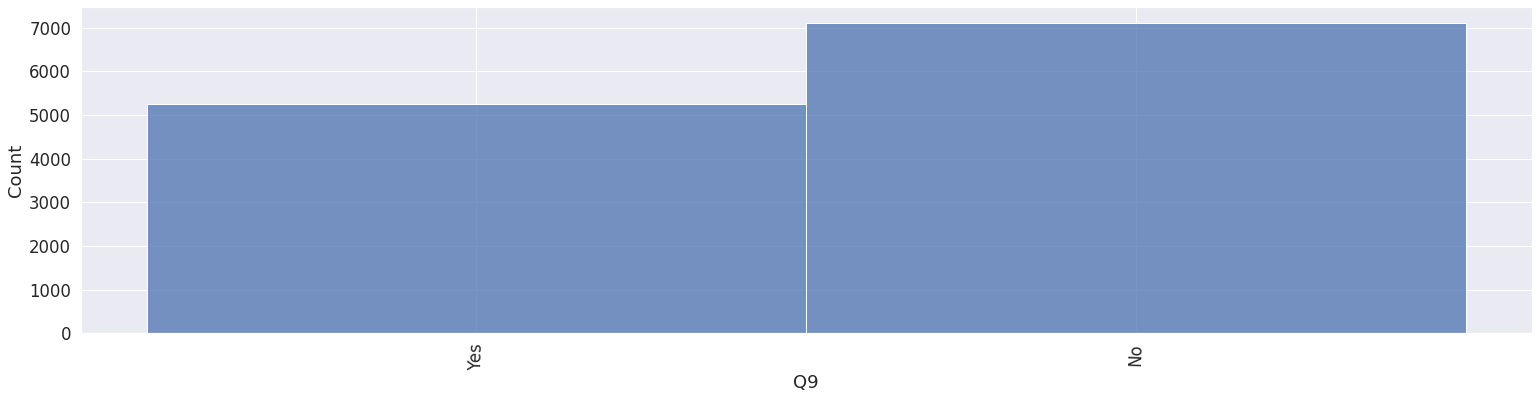

In [136]:
df1 = df.iloc[1:]
plt.figure(figsize=(26,6))
ax = sns.histplot(df1,x = "Q9")
ax.tick_params(axis='x', rotation=88)

# Did your research make use of machine learning?

In [133]:
q10 = df.iloc[:,26:28+1]
cc = q10.iloc[0,:]
cc = [a.split("-")[-1] for a in cc]
q10 = q10.iloc[1:]
q10.columns=cc
q10

,"Yes, the research made advances related to some novel machine learning method (theoretical research)","Yes, the research made use of machine learning as a tool (applied research)",No
1,NaN,NaN,NaN
2,NaN,NaN,No
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
...,...,...,...
23993,NaN,NaN,NaN
23994,NaN,NaN,NaN
23995,NaN,NaN,No
23996,NaN,"Yes, the research made use of machine learning as a tool (applied research)",NaN


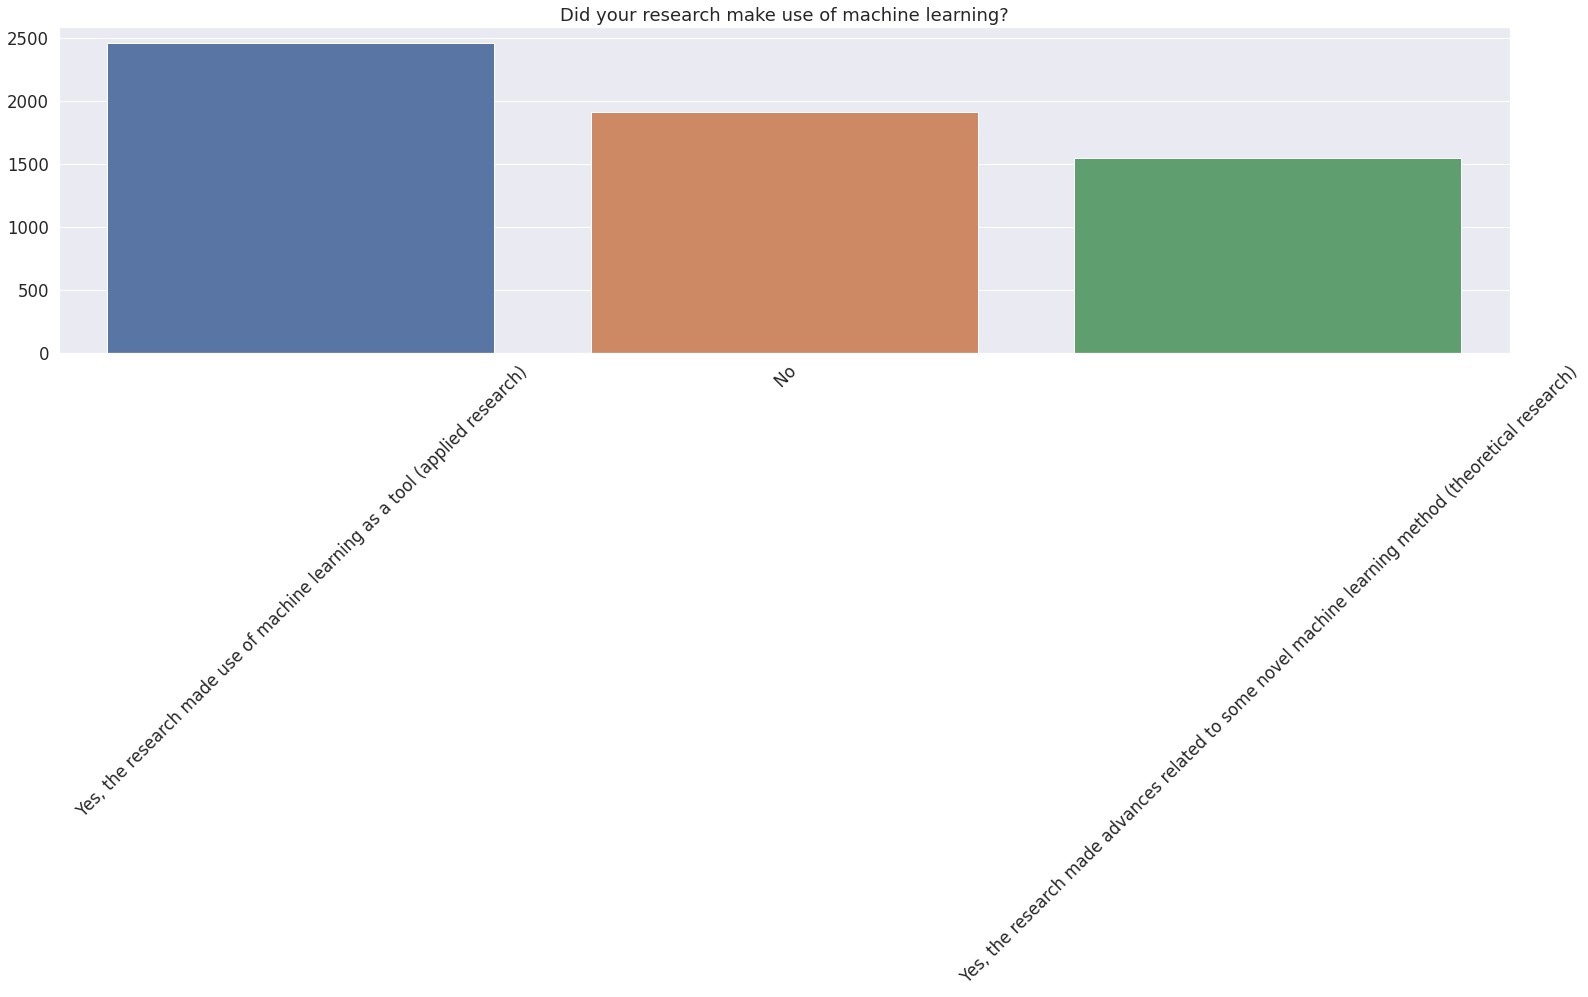

In [134]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q10.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=45)
plt.title('Did your research make use of machine learning?')
plt.show()

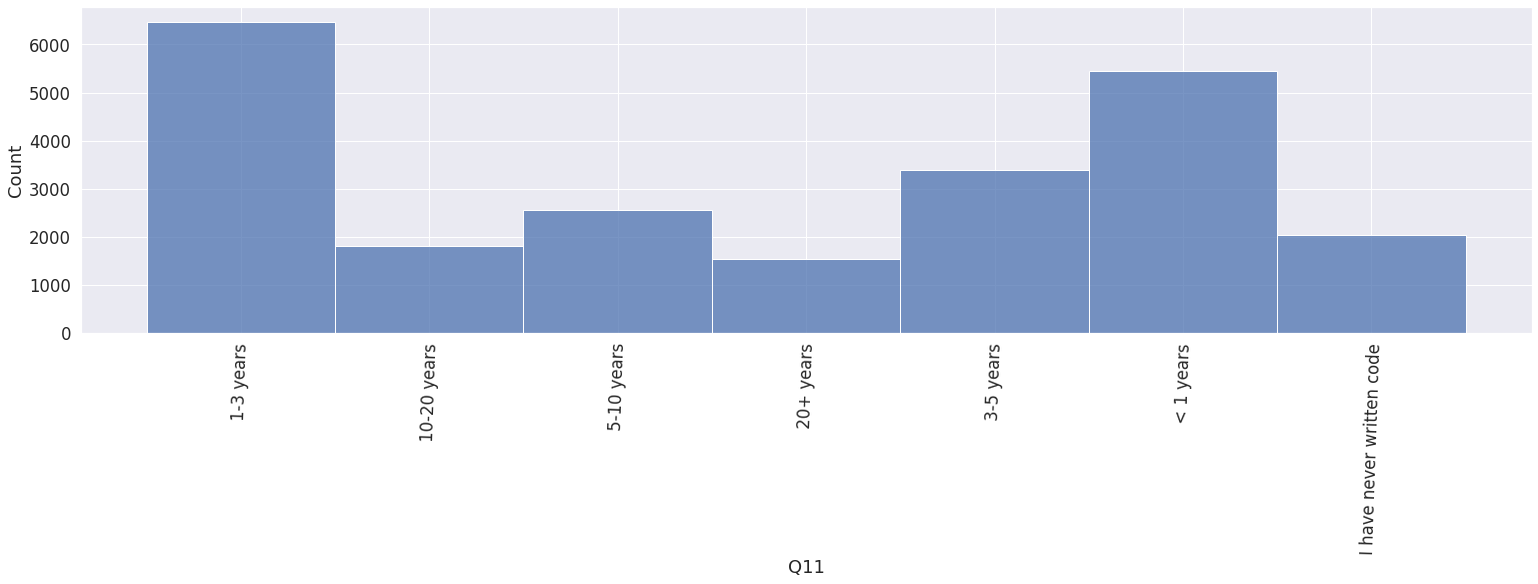

In [137]:
df1 = df.iloc[1:]
plt.figure(figsize=(26,6))
ax = sns.histplot(df1,x = "Q11")
ax.tick_params(axis='x', rotation=88)

# What programming languages do you use on a regular basis?

In [138]:
q12 = df.iloc[:,30:45]
cc = q12.iloc[0,:]
cc = [a.split("-")[-1] for a in cc]
q12 = q12.iloc[1:]
q12.columns=cc
q12

,Python,R,SQL,C,C#,C++,Java,Javascript,Bash,PHP,MATLAB,Julia,Go,None,Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,NaN,SQL,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23995,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23996,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN


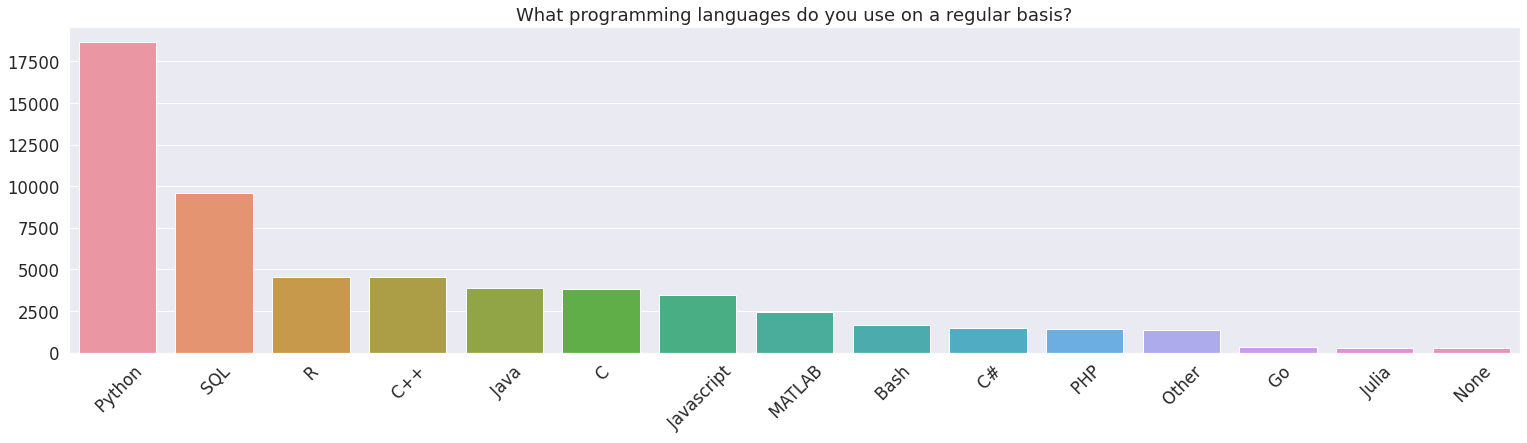

In [139]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q12.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=45)
plt.title('What programming languages do you use on a regular basis?')
plt.show()

# Which of the following integrated development environments (IDE s) do you use on a regular basis?

In [140]:
q13 = df.iloc[:,45:59]
cc = q13.iloc[0,:]
cc = [a.split("-")[-1] for a in cc]
q13 = q13.iloc[1:]
q13.columns=cc
q13

,JupyterLab,RStudio,Visual Studio,Visual Studio Code (VSCode),PyCharm,Spyder,Notepad++,Sublime Text,Vim / Emacs,MATLAB,Jupyter Notebook,IntelliJ,None,Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,NaN,NaN,NaN,Other
3,JupyterLab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN
4,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,Sublime Text,Vim / Emacs,NaN,Jupyter Notebook,NaN,NaN,NaN
5,NaN,NaN,NaN,Visual Studio Code (VSCode),PyCharm,Spyder,Notepad++,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,NaN,RStudio,NaN,Visual Studio Code (VSCode),PyCharm,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN
23994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
23995,NaN,NaN,NaN,NaN,PyCharm,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN
23996,NaN,RStudio,NaN,NaN,PyCharm,NaN,Notepad++,NaN,NaN,NaN,NaN,NaN,NaN,NaN


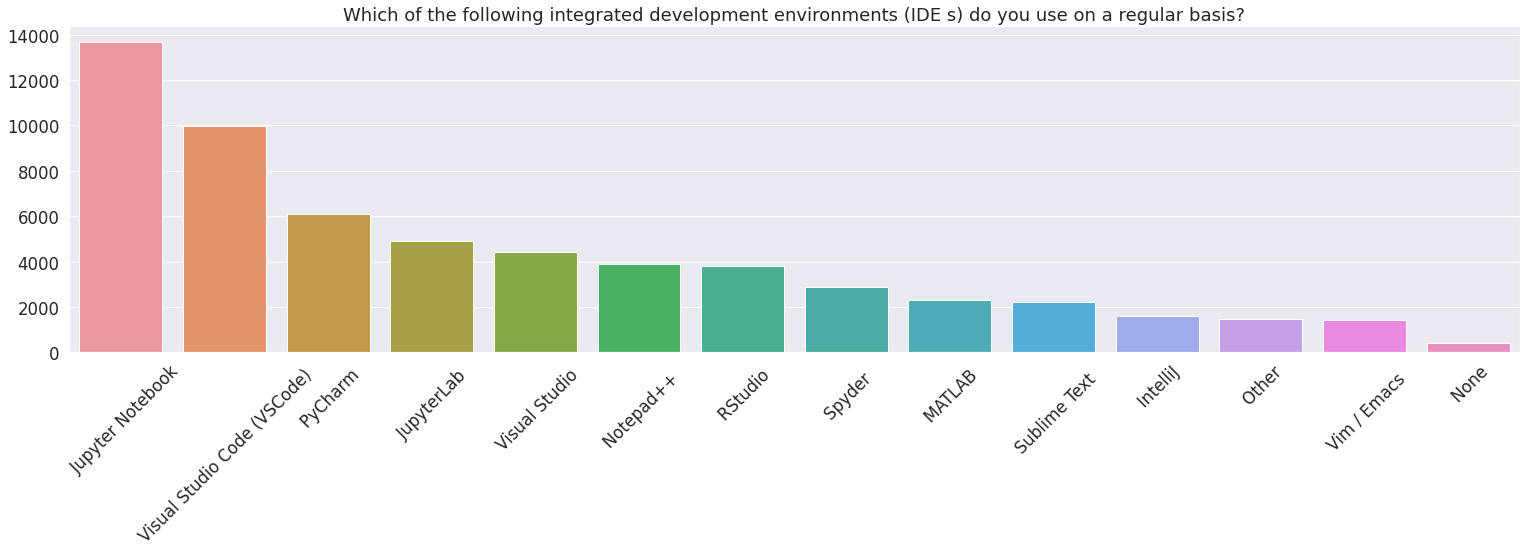

In [141]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q13.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=45)
plt.title('Which of the following integrated development environments (IDE s) do you use on a regular basis?')
plt.show()

# Do you use any of the following hosted notebook products?

In [142]:
q14 = df.iloc[:,59:75]
cc = q14.iloc[0,:]
cc = [a.split("-")[-1] for a in cc]
q14 = q14.iloc[1:]
q14.columns=cc
q14

,Kaggle Notebooks,Colab Notebooks,Azure Notebooks,Code Ocean,IBM Watson Studio,Amazon Sagemaker Studio,Amazon Sagemaker Studio Lab,Amazon EMR Notebooks,Google Cloud Vertex AI Workbench,Hex Workspaces,Noteable Notebooks,Databricks Collaborative Notebooks,Deepnote Notebooks,Gradient Notebooks,None,Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,Kaggle Notebooks,NaN,NaN,NaN,IBM Watson Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deepnote Notebooks,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
23995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
23996,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


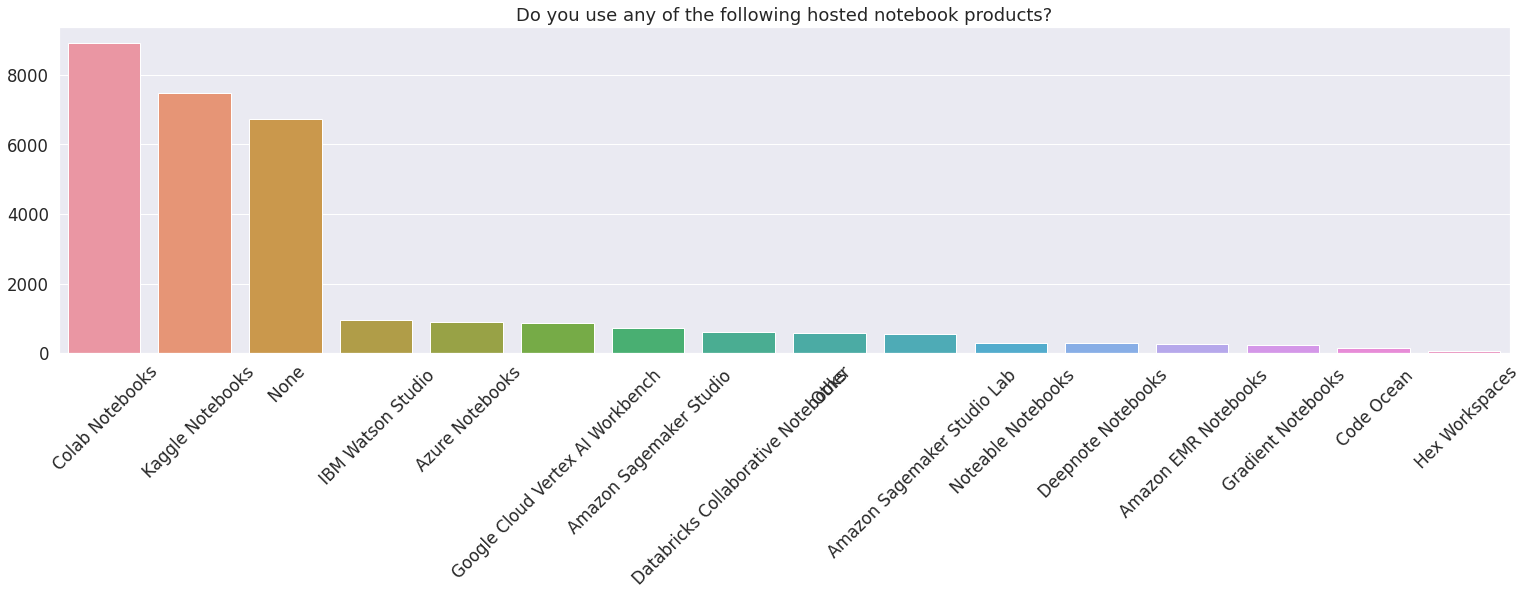

In [143]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q14.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=45)
plt.title('Do you use any of the following hosted notebook products?')
plt.show()

# Do you use any of the following hosted notebook products?

In [144]:
q15 = df.iloc[:,75:90]
cc = q15.iloc[0,:]
cc = [a.split("-")[-1] for a in cc]
q15 = q15.iloc[1:]
q15.columns=cc
q15

,Matplotlib,Seaborn,Plotly / Plotly Express,Ggplot / ggplot2,Shiny,D3 js,Altair,Bokeh,Geoplotlib,Leaflet / Folium,Pygal,Dygraphs,Highcharter,None,Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Matplotlib,Seaborn,Plotly / Plotly Express,NaN,NaN,NaN,NaN,NaN,Geoplotlib,NaN,NaN,NaN,NaN,NaN,NaN
4,Matplotlib,Seaborn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,Matplotlib,Seaborn,NaN,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
23995,NaN,Seaborn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23996,Matplotlib,NaN,NaN,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


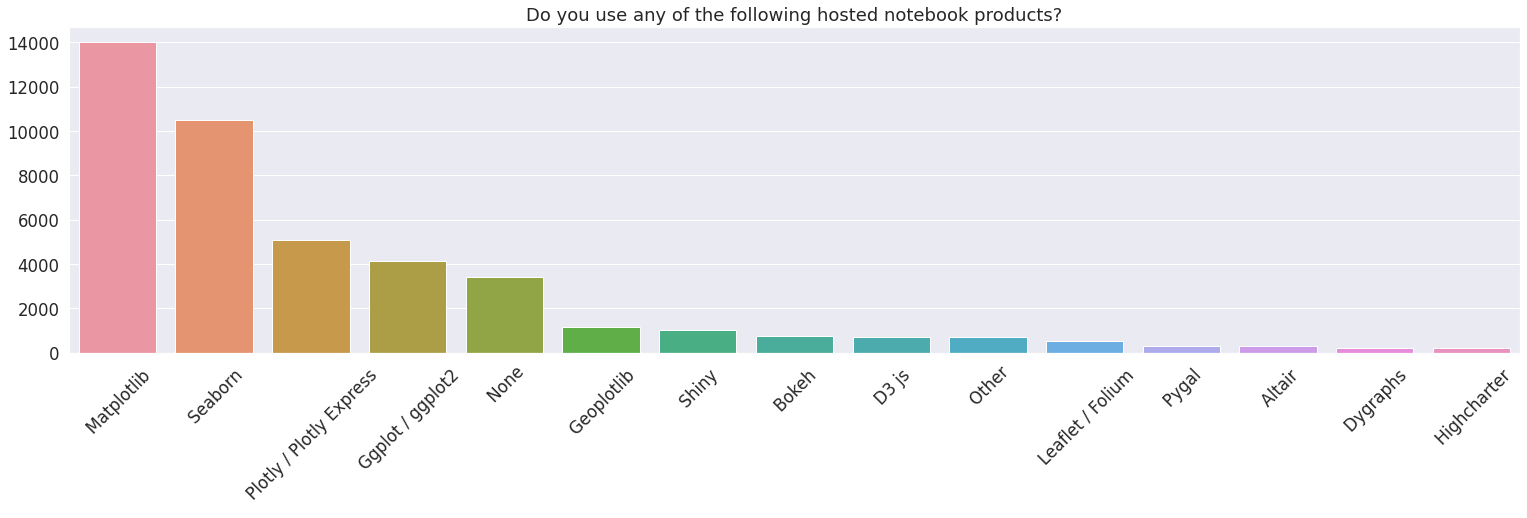

In [145]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q15.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=45)
plt.title('Do you use any of the following hosted notebook products?')
plt.show()

# Which of the following machine learning frameworks do you use on a regular basis?

In [146]:
q17 = df.iloc[:,91:106]
cc = q17.iloc[0,:]
cc = [a.split("-")[-1] for a in cc]
cc[0] = "Scikit-learn"
q17 = q17.iloc[1:]
q17.columns=cc
q17

,Scikit-learn,TensorFlow,Keras,PyTorch,Fast.ai,Xgboost,LightGBM,CatBoost,Caret,Tidymodels,JAX,PyTorch Lightning,Huggingface,None,Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Scikit-learn,TensorFlow,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scikit-learn,NaN,NaN,PyTorch,NaN,Xgboost,NaN,NaN,NaN,NaN,NaN,PyTorch Lightning,NaN,NaN,NaN
4,Scikit-learn,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Huggingface,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,Scikit-learn,TensorFlow,Keras,PyTorch,NaN,Xgboost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
23995,NaN,NaN,NaN,NaN,NaN,Xgboost,LightGBM,CatBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23996,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


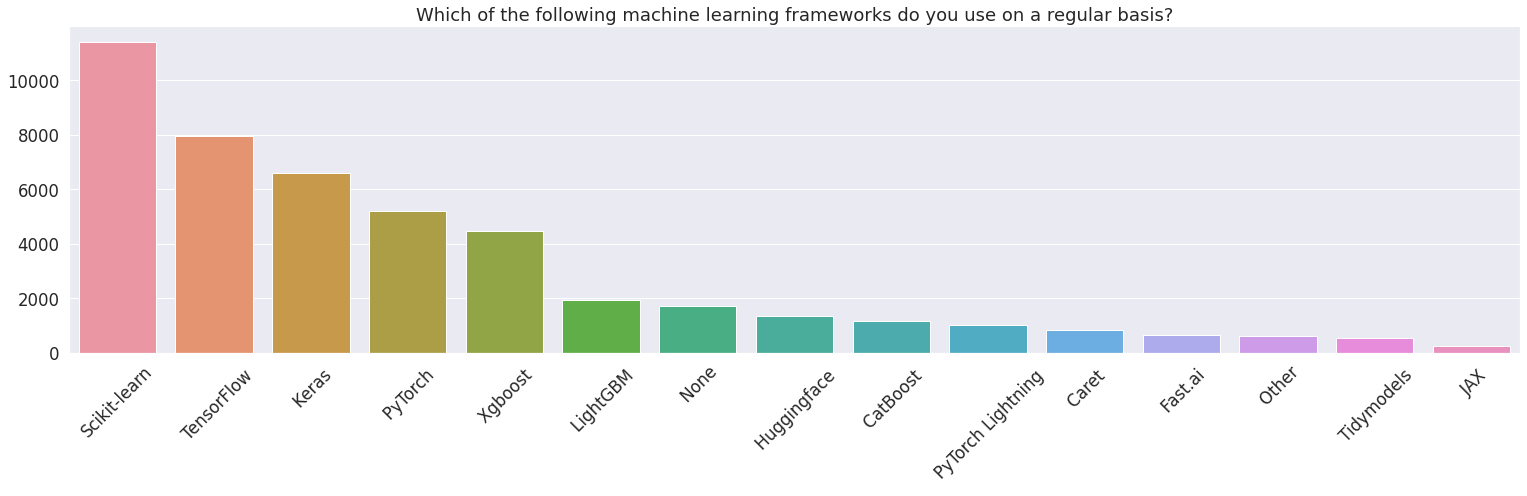

In [147]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q17.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=45)
plt.title('Which of the following machine learning frameworks do you use on a regular basis?')
plt.show()

# Which of the following ML algorithms do you use on a regular basis?

In [148]:
q18 = df.iloc[:,106:120]
cc = q18.iloc[0,:]
cc = [a.split("-")[-1] for a in cc]
cc[9] = "Transformer Networks"
q18 = q18.iloc[1:]
q18.columns=cc
q18

,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm, etc)",Bayesian Approaches,Evolutionary Approaches,"Dense Neural Networks (MLPs, etc)",Convolutional Neural Networks,Generative Adversarial Networks,Recurrent Neural Networks,Transformer Networks,"Autoencoder Networks (DAE, VAE, etc)",Graph Neural Networks,None,Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Bayesian Approaches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Transformer Networks (BERT, gpt-3, etc)",NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm, etc)",NaN,NaN,NaN,Convolutional Neural Networks,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,Linear or Logistic Regression,Decision Trees or Random Forests,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23995,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,Decision Trees or Random Forests,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


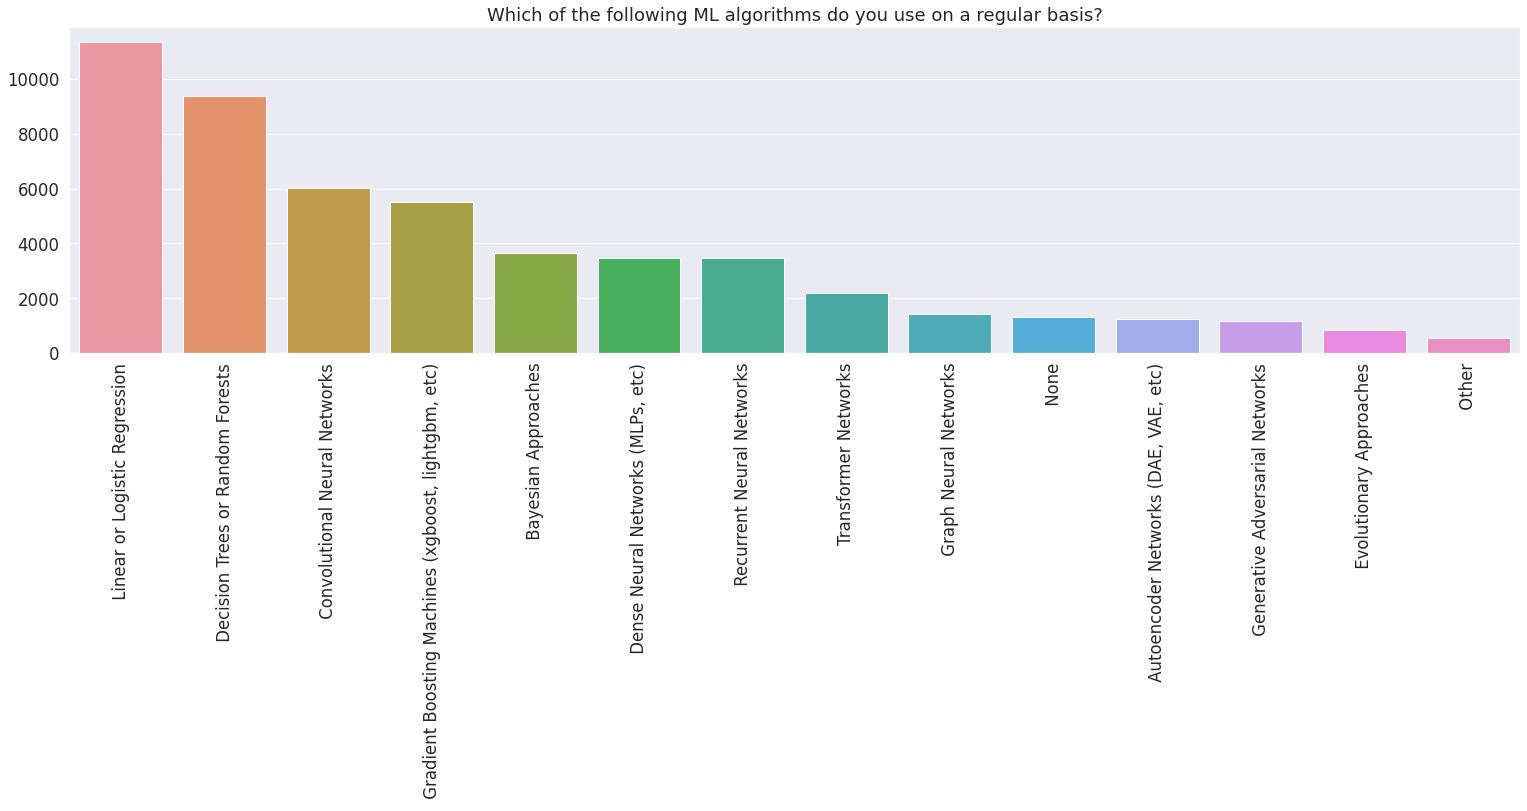

In [149]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q18.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=90)
plt.title('Which of the following ML algorithms do you use on a regular basis?')
plt.show()

# Which categories of computer vision methods do you use on a regular basis?

In [150]:
q19 = df.iloc[:,120:128]
cc = q19.iloc[0,:]
cc = [a.split("-")[-1] for a in cc]
cc[1] = "Image segmentation methods (U-Net, Mask R-CNN, etc)"
q19 = q19.iloc[1:]
q19.columns=cc
q19

,"General purpose image/video tools (PIL, cv2, skimage, etc)","Image segmentation methods (U-Net, Mask R-CNN, etc)","Object detection methods (YOLOv6, RetinaNet, etc)","Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)","Generative Networks (GAN, VAE, etc)","Vision transformer networks (ViT, DeiT, BiT, BEiT, Swin, etc)",None,Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
23993,NaN,"Image segmentation methods (U-Net, Mask R-CNN, etc)","Object detection methods (YOLOv6, RetinaNet, etc)","Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)",NaN,NaN,NaN,NaN
23994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


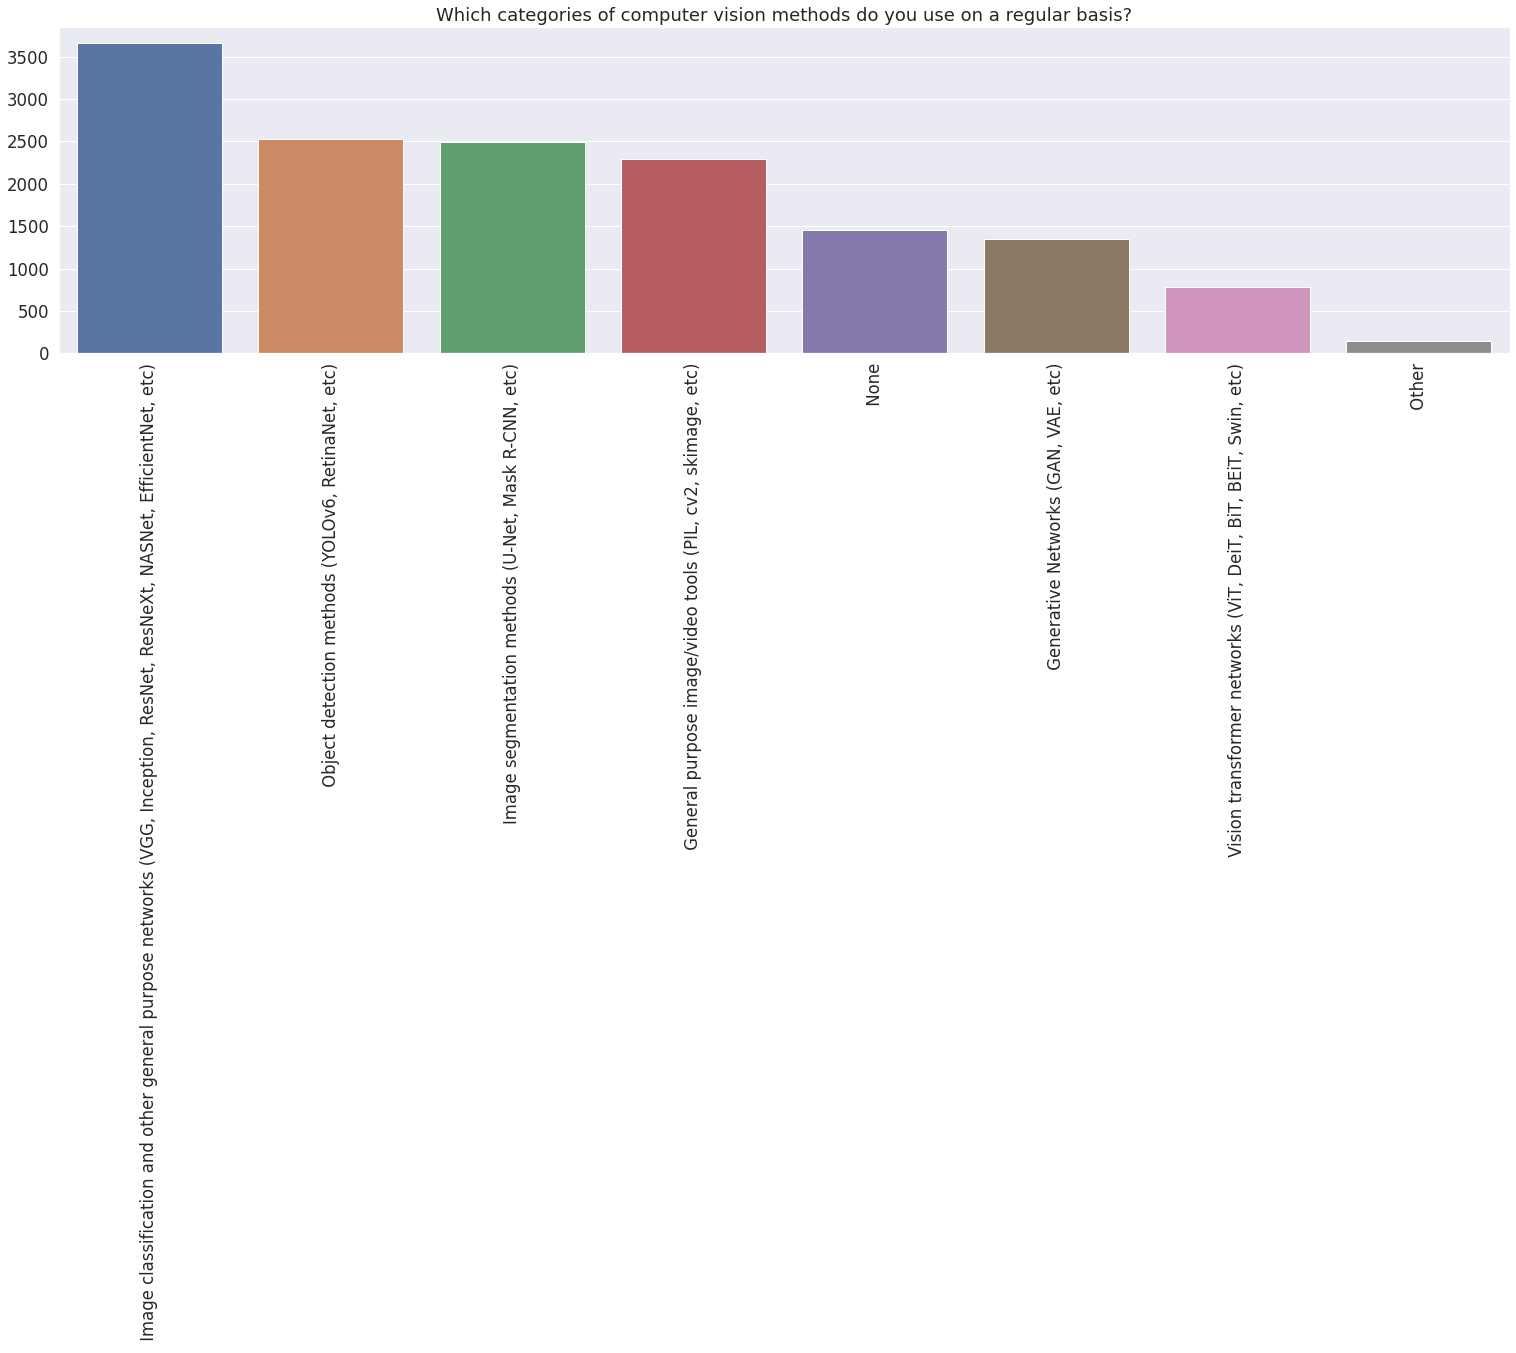

In [151]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q19.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=90)
plt.title('Which categories of computer vision methods do you use on a regular basis?')
plt.show()

# Which of the following natural language processing (NLP) methods do you use on a regular basis?

In [152]:
q20 = df.iloc[:,128:134]
cc = q20.iloc[0,:]
cc = [a.split("-")[-1] for a in cc]
cc[1] = "Encoder-decoder models (seq2seq, vanilla transformers)"
cc[3] = "Transformer language models (GPT-3, BERT, XLnet, etc)"
q20 = q20.iloc[1:]
q20.columns=cc
q20

,"Word embeddings/vectors (GLoVe, fastText, word2vec)","Encoder-decoder models (seq2seq, vanilla transformers)","Contextualized embeddings (ELMo, CoVe)","Transformer language models (GPT-3, BERT, XLnet, etc)",None,Other
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,"Word embeddings/vectors (GLoVe, fastText, word2vec)","Encoder-decoder models (seq2seq, vanilla transformers)",NaN,"Transformer language models (GPT-3, BERT, XLnet, etc)",NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
23993,NaN,NaN,NaN,NaN,NaN,NaN
23994,NaN,NaN,NaN,NaN,NaN,NaN
23995,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


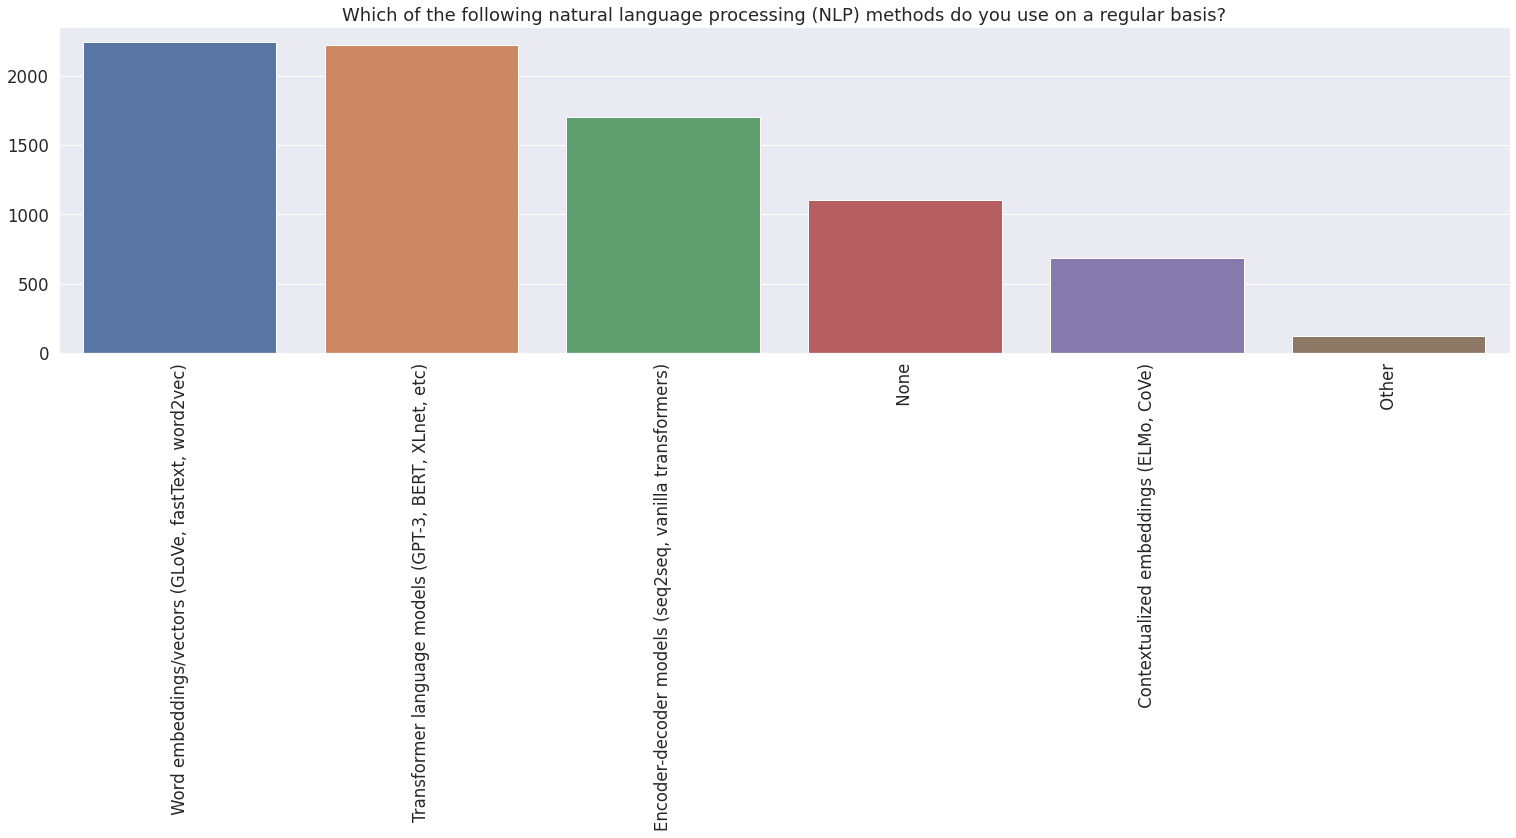

In [153]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q20.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=90)
plt.title('Which of the following natural language processing (NLP) methods do you use on a regular basis?')
plt.show()

# Do you download pre-trained model weights from any of the following services?

In [154]:
q21 = df.iloc[:,134:144]
cc = q21.iloc[0,:]
cc = [a.split("-")[-1] for a in cc]
cc[8] = "I do not download pre-trained model weights on a regular basis"
q21 = q21.iloc[1:]
q21.columns=cc
q21

,TensorFlow Hub,PyTorch Hub,Huggingface Models,Timm,Jumpstart,ONNX models,NVIDIA NGC models,Kaggle datasets,I do not download pre-trained model weights on a regular basis,Other storage services (i.e. google drive)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, I do not download pre-trained model weights on a regular basis",NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle datasets,NaN,NaN
4,NaN,NaN,Huggingface Models,NaN,NaN,ONNX models,NaN,NaN,NaN,Other storage services (i.e. google drive)
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
23993,TensorFlow Hub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other storage services (i.e. google drive)
23995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle datasets,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, I do not download pre-trained model weights on a regular basis",NaN


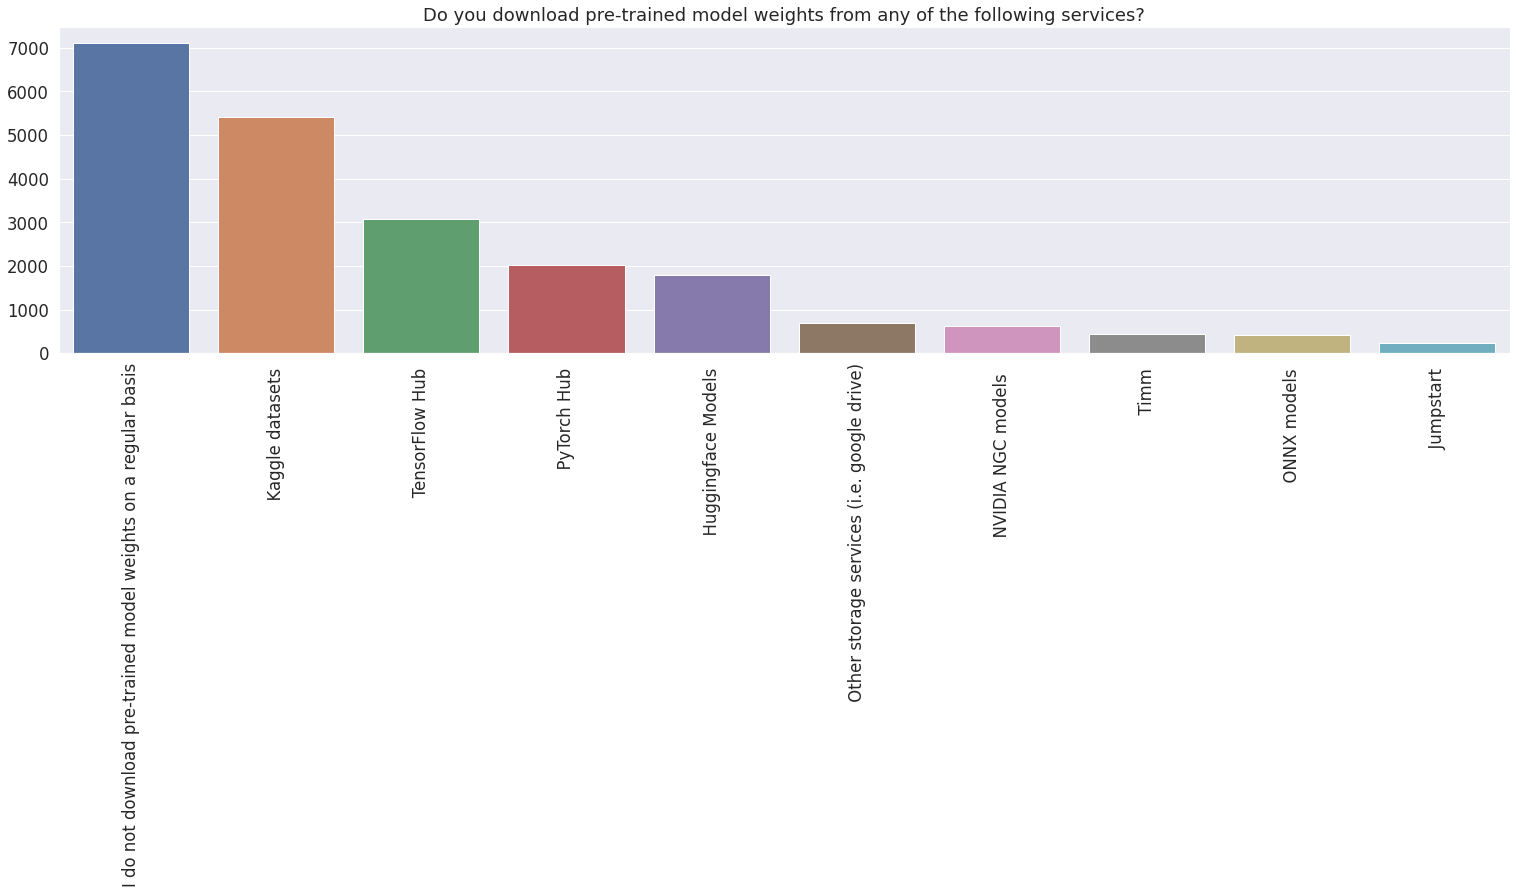

In [155]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q21.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=90)
plt.title('Do you download pre-trained model weights from any of the following services?')
plt.show()

# Which of the following ML model hubs/repositories do you use most often?

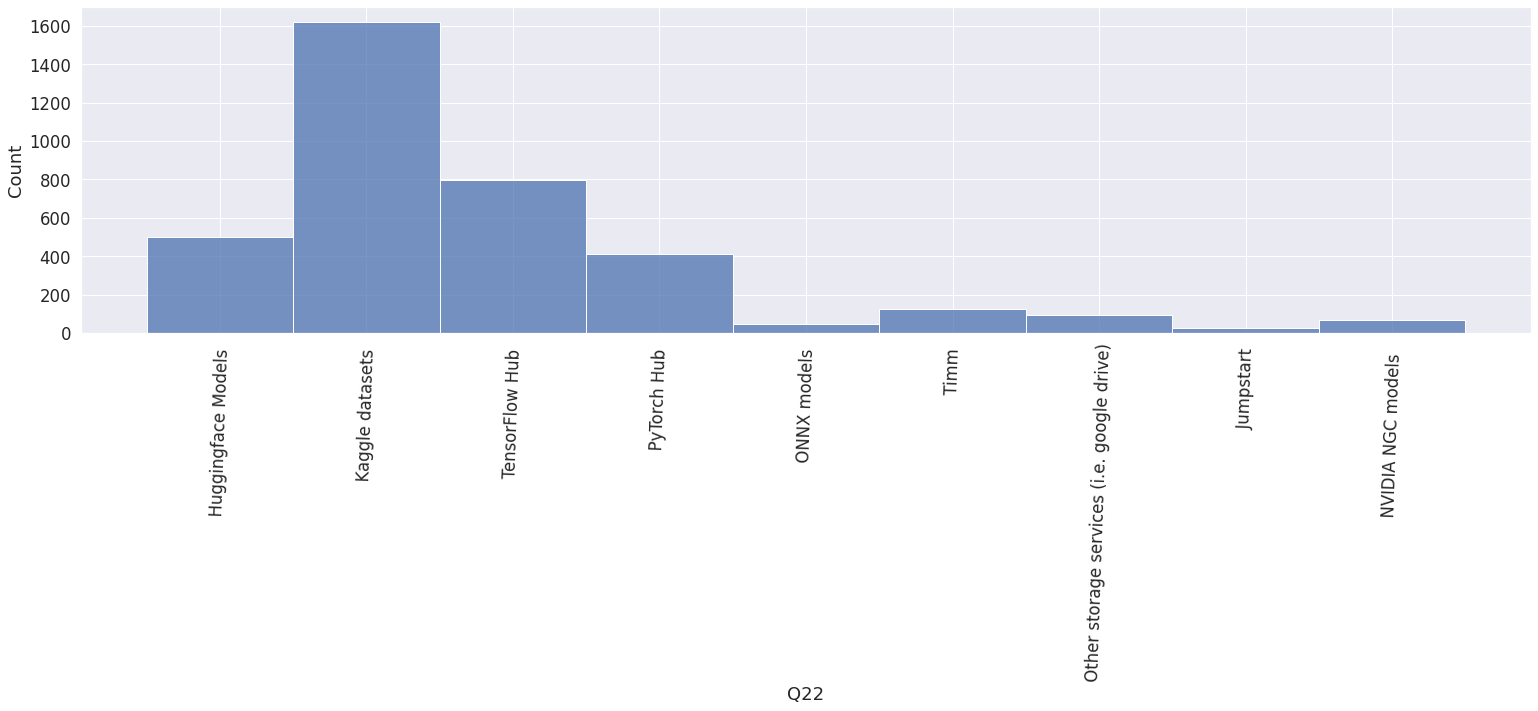

In [158]:
df1 = df.iloc[1:]
plt.figure(figsize=(26,6))
ax = sns.histplot(df1,x = "Q22")
ax.tick_params(axis='x', rotation=88)

# Select the title most similar to your current role (or most recent title if retired)

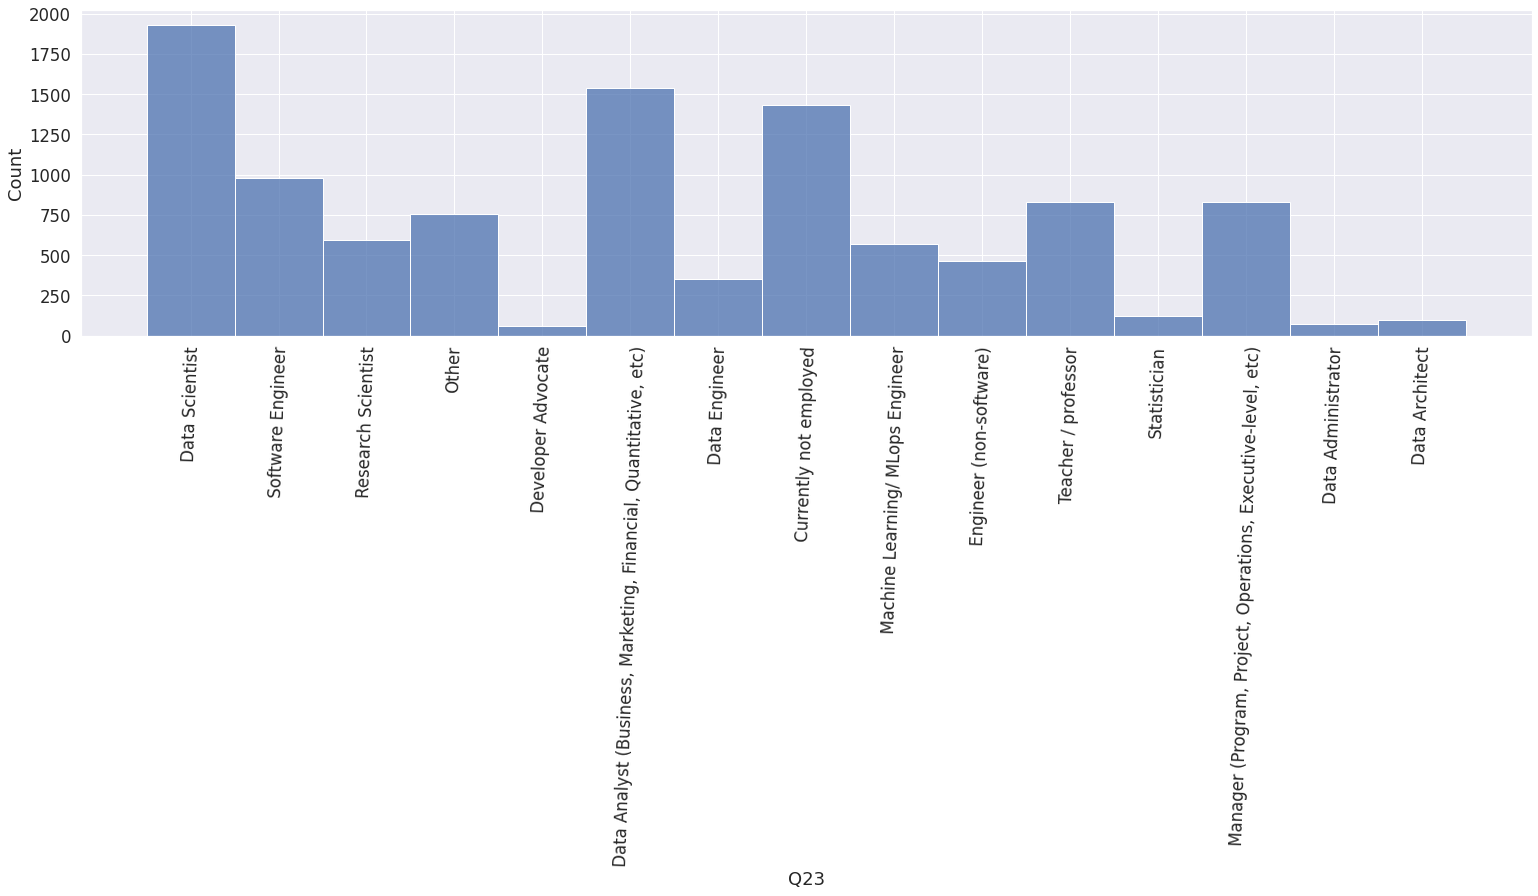

In [159]:
df1 = df.iloc[1:]
plt.figure(figsize=(26,6))
ax = sns.histplot(df1,x = "Q23")
ax.tick_params(axis='x', rotation=88)

# In what industry is your current employer/contract (or your most recent employer if retired)?

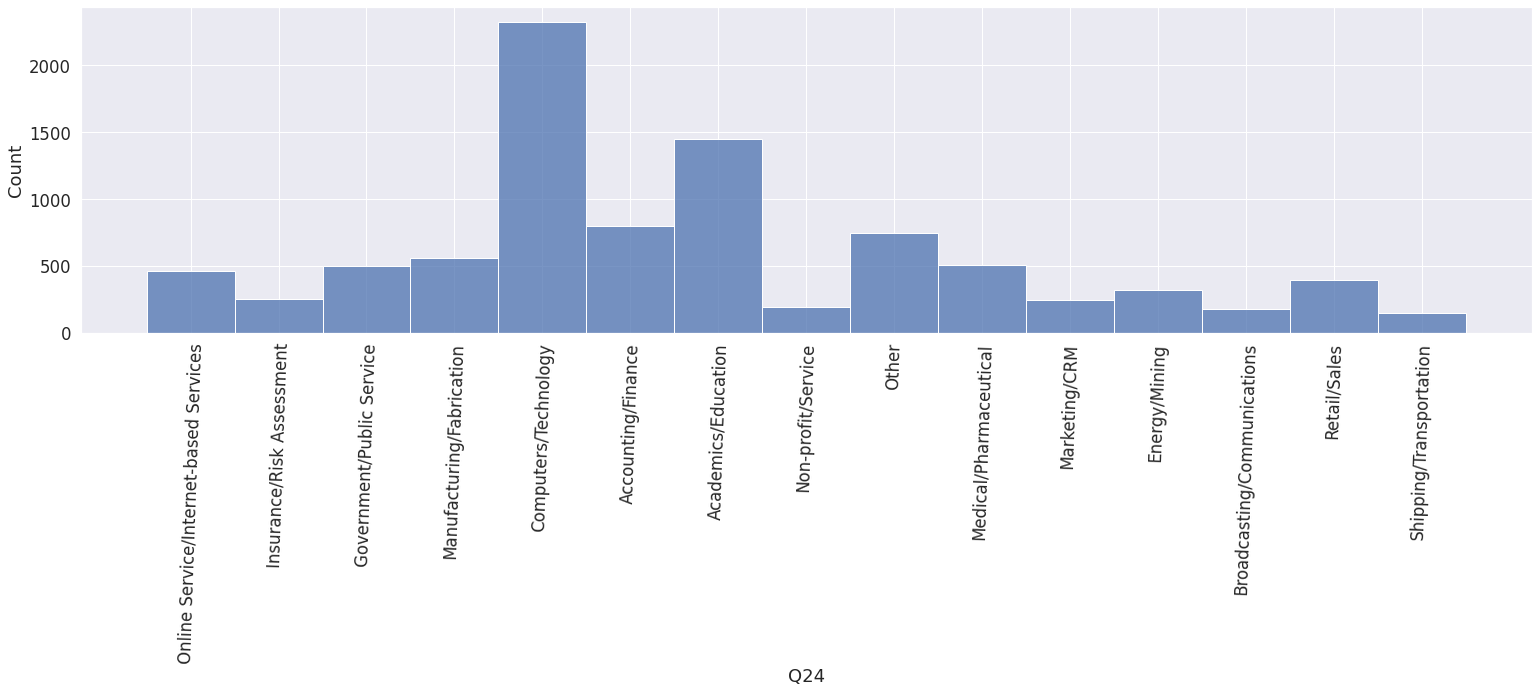

In [160]:
df1 = df.iloc[1:]
plt.figure(figsize=(26,6))
ax = sns.histplot(df1,x = "Q24")
ax.tick_params(axis='x', rotation=88)

# What is the size of the company where you are employed?

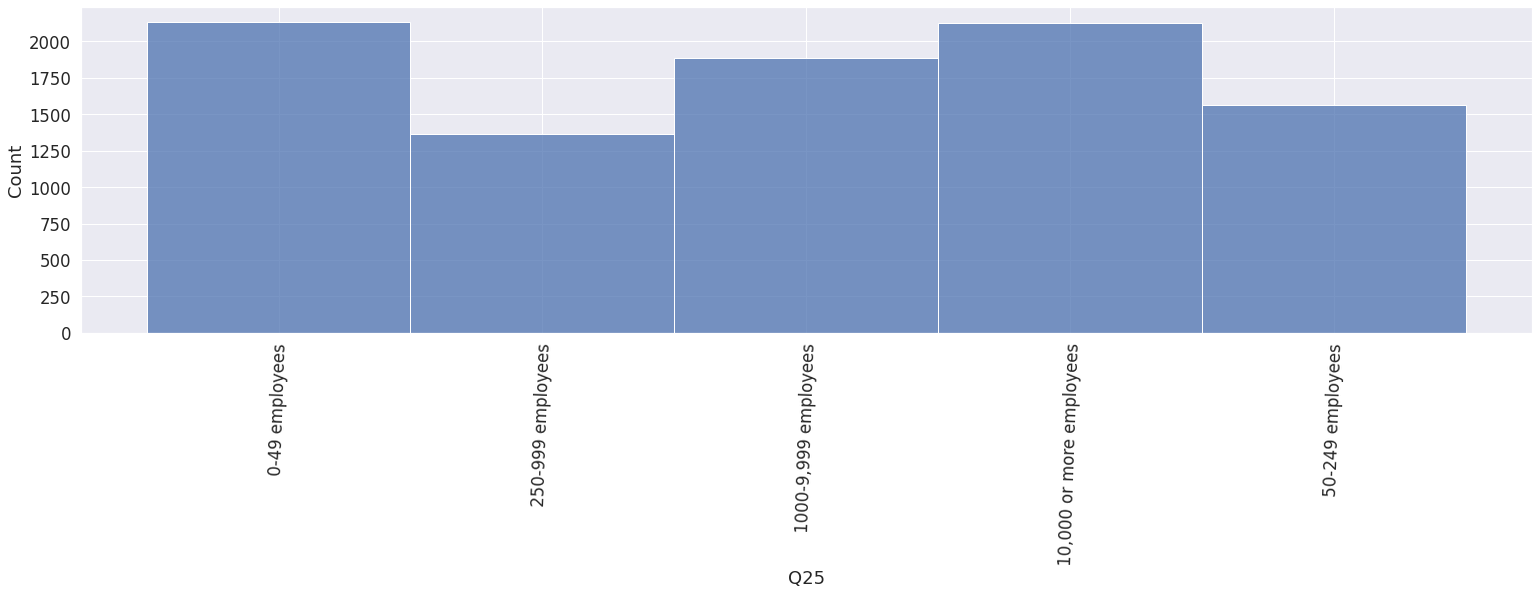

In [161]:
df1 = df.iloc[1:]
plt.figure(figsize=(26,6))
ax = sns.histplot(df1,x = "Q25")
ax.tick_params(axis='x', rotation=88)

# Approximately how many individuals are responsible for data science workloads at your place of business?

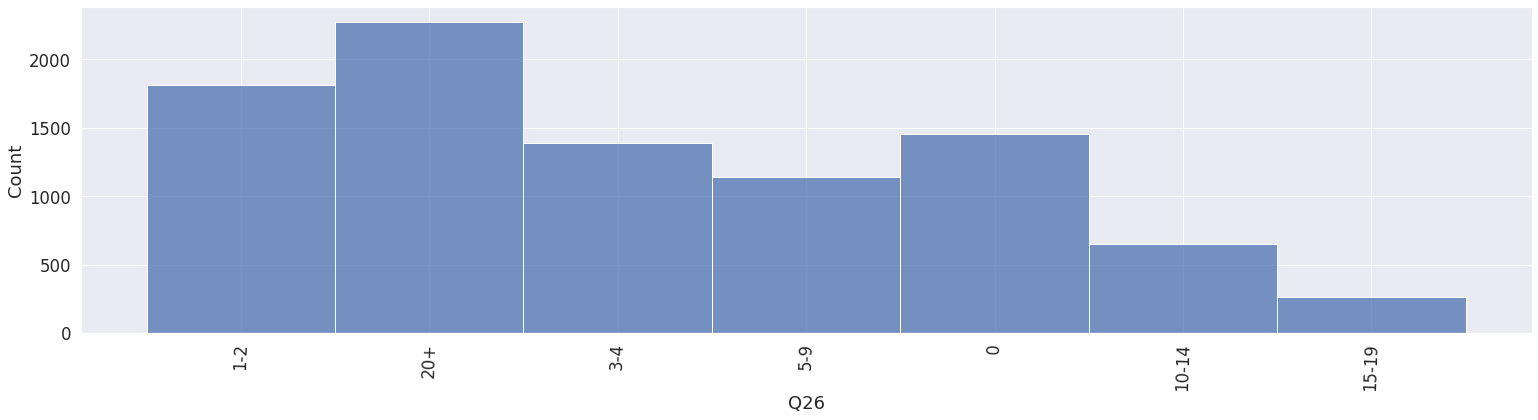

In [162]:
df1 = df.iloc[1:]
plt.figure(figsize=(26,6))
ax = sns.histplot(df1,x = "Q26")
ax.tick_params(axis='x', rotation=88)

# Does your current employer incorporate machine learning methods into their business?

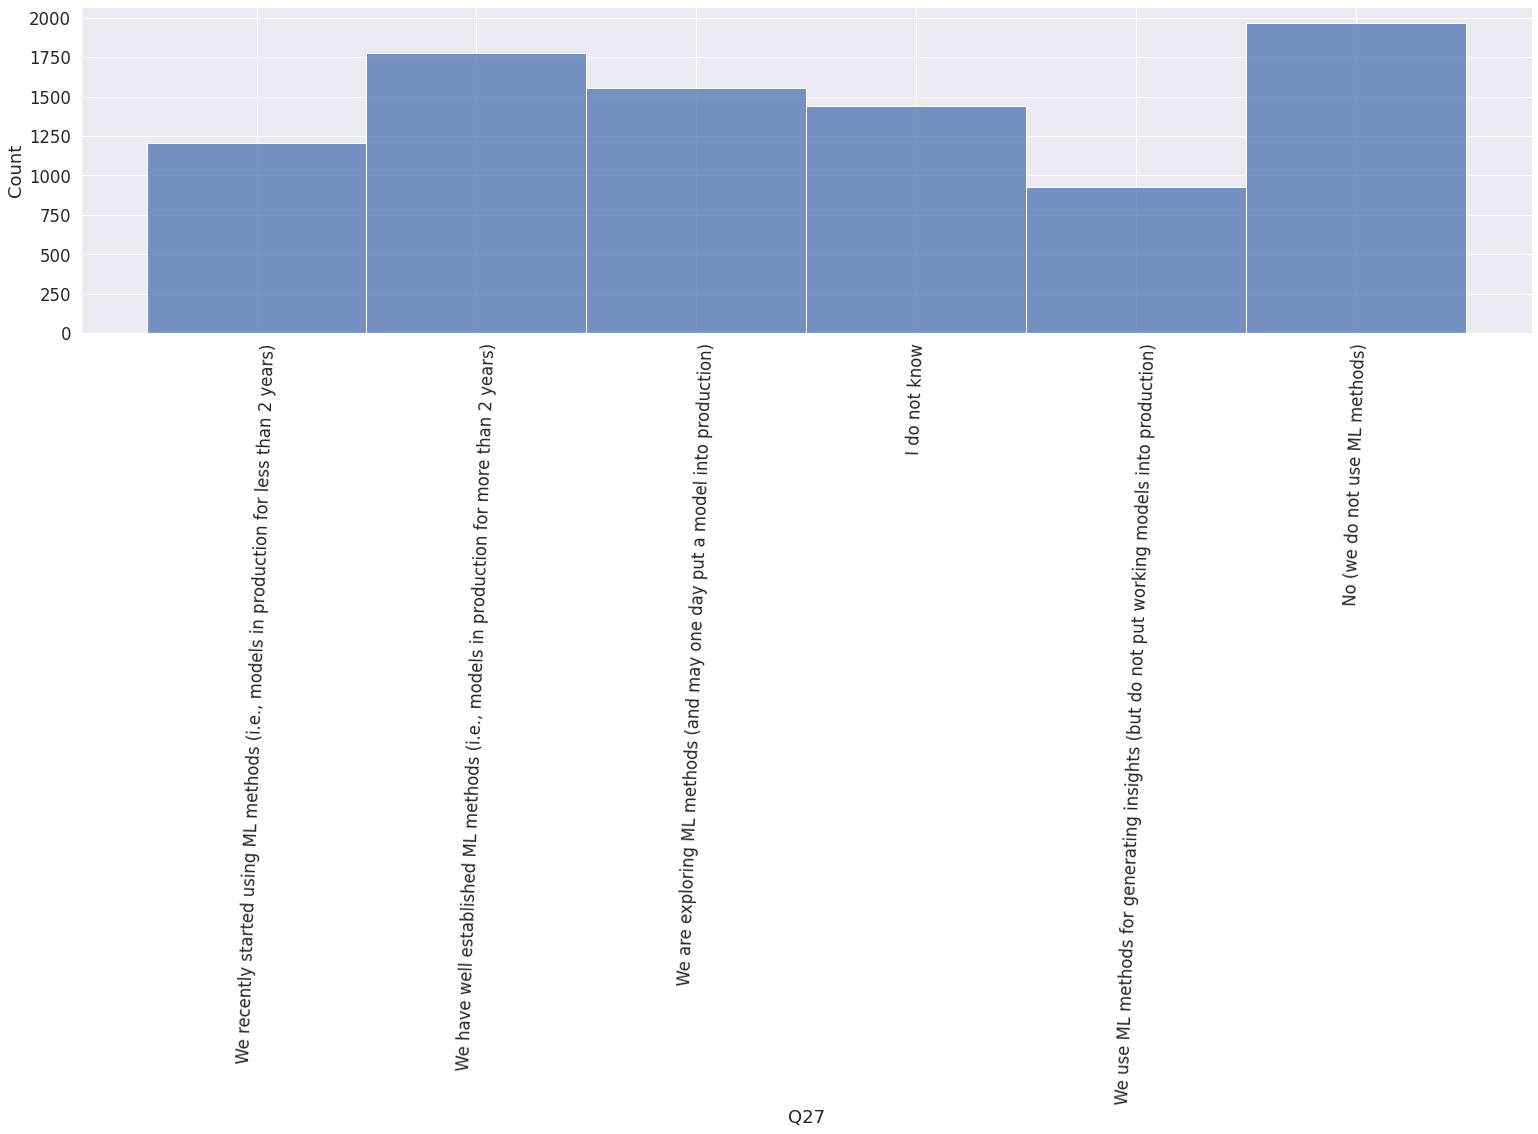

In [167]:
df1 = df.iloc[1:]
plt.figure(figsize=(26,6))
ax = sns.histplot(df1,x = "Q27")
ax.tick_params(axis='x', rotation=88)

# Select any activities that make up an important part of your role at work

In [176]:
q28 = df.iloc[:,150:158]
cc = q28.iloc[0,:]
cc = [a.split("-")[-1] for a in cc]
q28 = q28.iloc[1:]
q28.columns=cc
q28

,Analyze and understand data to influence product or business decisions,"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Build prototypes to explore applying machine learning to new areas,Build and/or run a machine learning service that operationally improves my product or workflows,Experimentation and iteration to improve existing ML models,Do research that advances the state of the art of machine learning,None of these activities are an important part of my role at work,Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Build prototypes to explore applying machine learning to new areas,Build and/or run a machine learning service that operationally improves my product or workflows,Experimentation and iteration to improve existing ML models,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
23993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23995,NaN,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part of my role at work,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part of my role at work,NaN


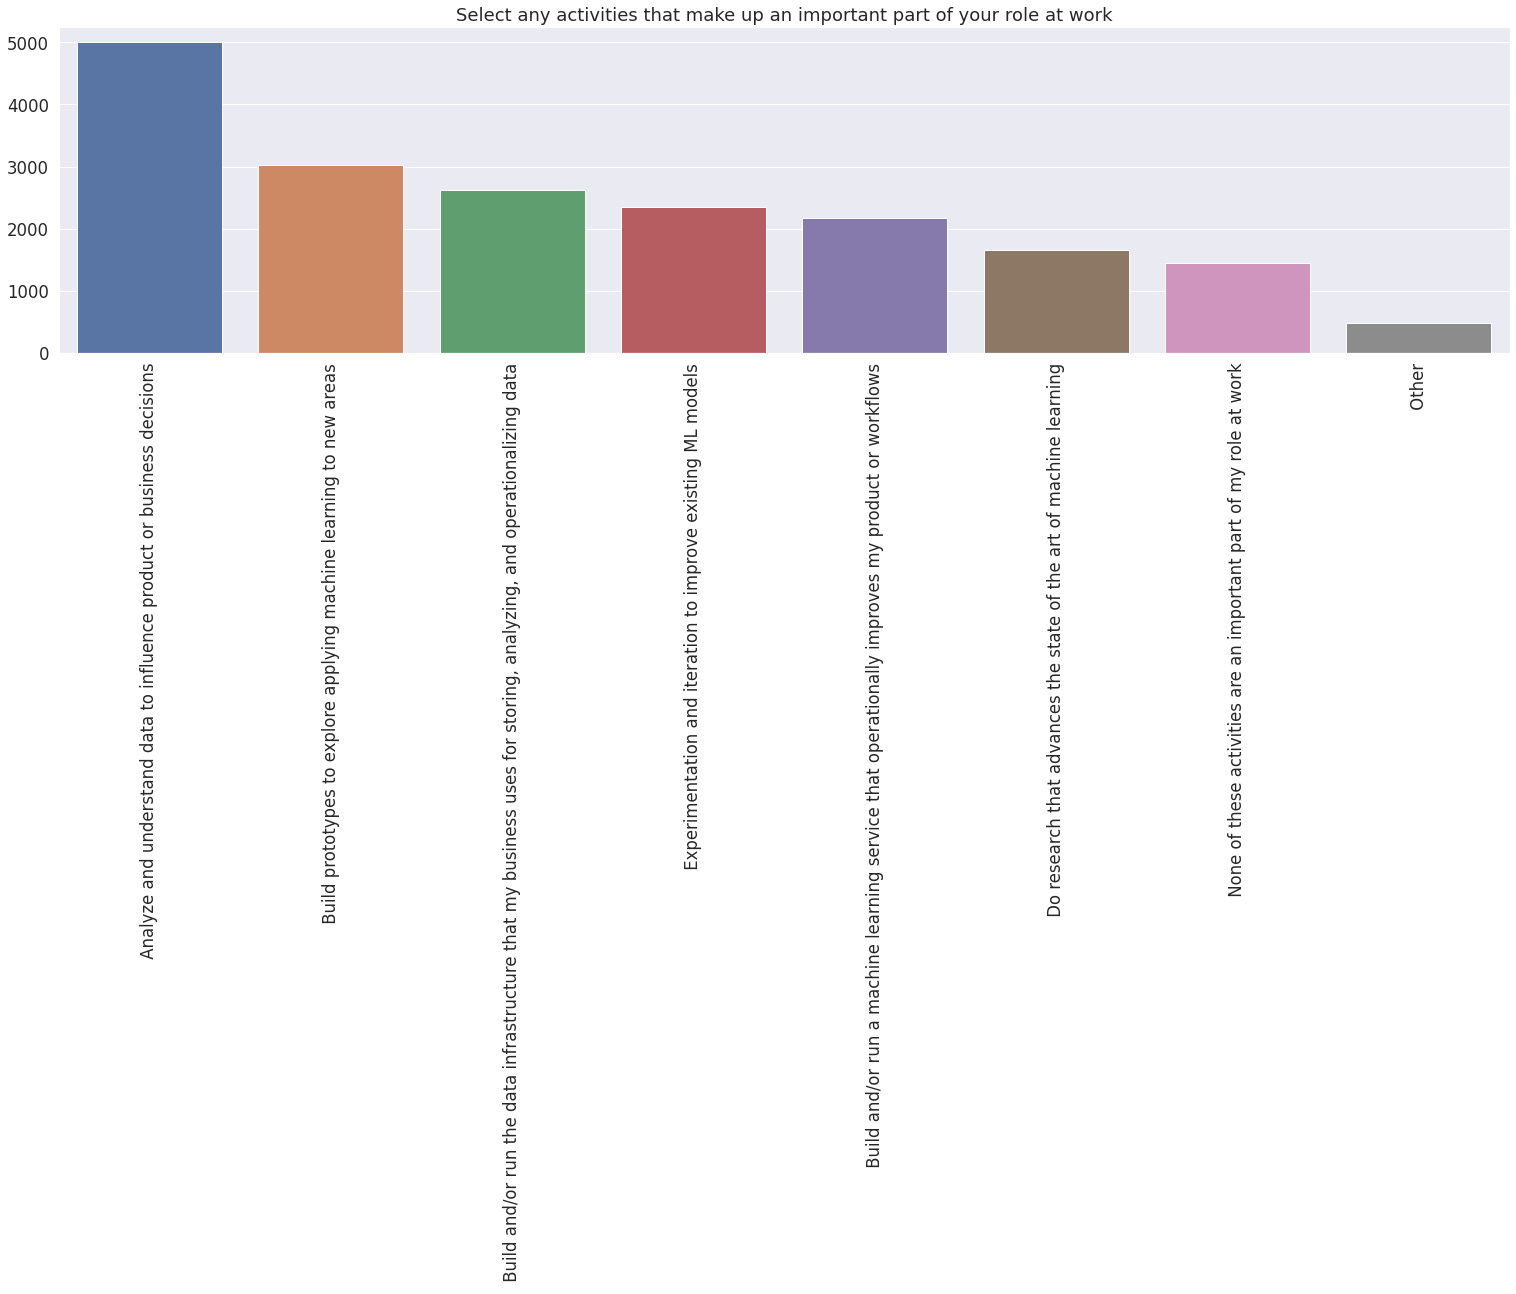

In [177]:
plt.figure(figsize=(26,6))
dd = pd.DataFrame(q28.notna().sum().sort_values(ascending=False)).T
ax = sns.barplot(data=dd)
ax.tick_params(axis='x', rotation=90)
plt.title('Select any activities that make up an important part of your role at work')
plt.show()

# What is your current yearly compensation (approximate $USD)?

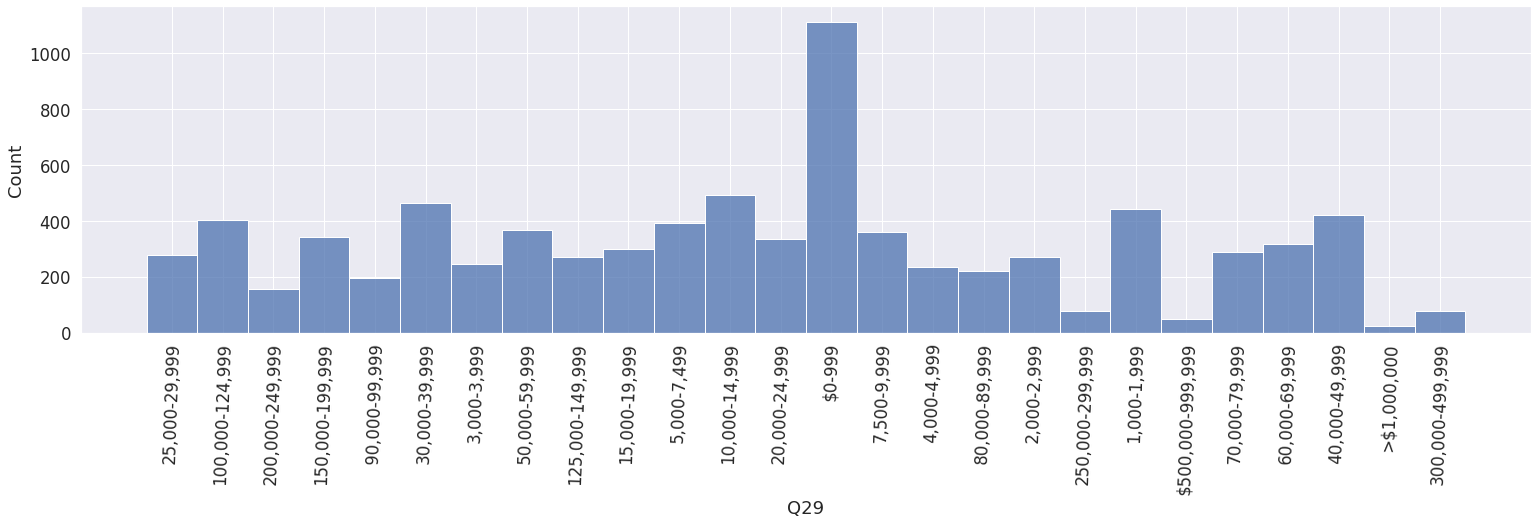

In [178]:
df1 = df.iloc[1:]
plt.figure(figsize=(26,6))
ax = sns.histplot(df1,x = "Q29")
ax.tick_params(axis='x', rotation=88)

# Approximately how much money have you spent on machine learning and/or cloud computing services at home or at work in the past 5 years (approximate  𝑈𝑆𝐷)?\n(𝑎𝑝𝑝𝑟𝑜𝑥𝑖𝑚𝑎𝑡𝑒 USD)?

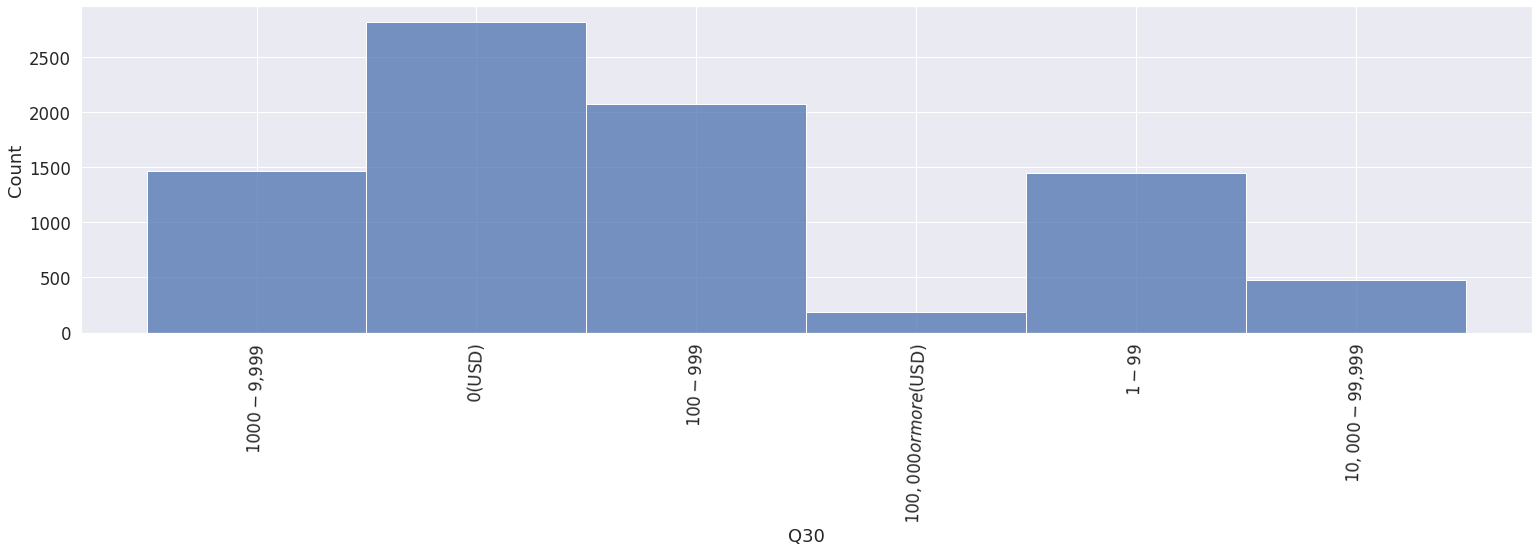

In [180]:
df1 = df.iloc[1:]
plt.figure(figsize=(26,6))
ax = sns.histplot(df1,x = "Q30")
ax.tick_params(axis='x', rotation=88)

****will be updated soon****